<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [79]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy import *
from PIL import Image, ImageOps
%matplotlib inline


In [3]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [5]:
input_shape = 784

In [6]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  X_train.append(np.asfarray(rows.split(',')[1:]))
  y_train.append(int(rows.split(',')[0]))

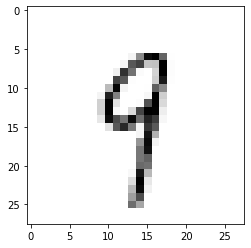

In [152]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 #scaling input data to be between 0 and 1
y_train = np.array(y_train)
matplotlib.pyplot.imshow(X_train[900].reshape([28,28]),cmap='Greys',interpolation='None')

In [9]:
model = Sequential()
model.add(Dense(units=input_shape,activation=None))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
#model.summary()

In [13]:
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f73c3d9e588>>


In [14]:
model.fit(x=X_train,y=y_train,verbose=1,epochs=100,batch_size=128)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.8925 - accuracy: 0.7330
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.8899
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3153 - accuracy: 0.9070
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9178
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2572 - accuracy: 0.9235
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2378 - accuracy: 0.9292
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9359
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2009 - accuracy: 0.9396
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9456
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1721 - accura

In [15]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [16]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  X_test.append(np.asfarray(rows.split(',')[1:]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 #scaling test data
y_test = np.array(y_test)

In [17]:
#Evaluate the trained model on test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 32.4593 - accuracy: 0.9653


[32.4593391418457, 0.9653000235557556]

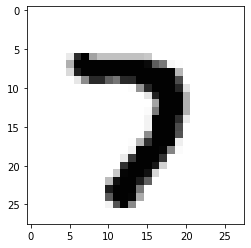

In [153]:
#Check a couple of images and their corresponding labels.
matplotlib.pyplot.imshow(X_test[9586].reshape([28,28]),cmap='Greys',interpolation='None')

In [130]:
pred_image = np.expand_dims(X_test[9586], axis=0)
np.argmax(model.predict(pred_image))

7

In [20]:
pip install pillow

In [181]:
img = Image.open("//content/gdrive/My Drive/MNIST/four.jpg")
img = np.asfarray(img)
print(img[10][10])
avg_pixel_value =  np.mean(img,axis=0,keepdims=True).astype(int)
print(avg_pixel_value)
img = np.concatenate([avg_pixel_value]*3,axis=3)
img = img.resize((28,28))
img_array = np.asfarray(img)/255.0
plt.pyplot.imshow(img_array)
print(img_array)
img_array = img_array.flatten()
img_pred = np.expand_dims(img_array, axis=0)
print(img_pred.shape)

[255. 255. 255.]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


AxisError: ignored

In [144]:
(model.predict(img_pred))

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)